In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../../'))

import numpy as np
from matplotlib import pyplot as plt
import h5py
import arrayfire as af

from dg_maxwell import params
from dg_maxwell import msh_parser
from dg_maxwell import lagrange
from dg_maxwell import global_variables as gvar
from dg_maxwell import advection_2d_arbit_mesh as a2d_arbit_mesh
from dg_maxwell import utils

af.set_backend(params.backend)
af.set_device(params.device)

plt.rcParams['figure.figsize']     = 12, 7.5
plt.rcParams['lines.linewidth']    = 1.5
plt.rcParams['font.family']        = 'serif'
plt.rcParams['font.weight']        = 'bold'
plt.rcParams['font.size']          = 20  
plt.rcParams['font.sans-serif']    = 'serif'
plt.rcParams['text.usetex']        = True
plt.rcParams['axes.linewidth']     = 1.5
plt.rcParams['axes.titlesize']     = 'medium'
plt.rcParams['axes.labelsize']     = 'medium'

plt.rcParams['xtick.major.size']   = 8
plt.rcParams['xtick.minor.size']   = 4
plt.rcParams['xtick.major.pad']    = 8
plt.rcParams['xtick.minor.pad']    = 8
plt.rcParams['xtick.color']        = 'k'
plt.rcParams['xtick.labelsize']    = 'medium'
plt.rcParams['xtick.direction']    = 'in'    

plt.rcParams['ytick.major.size']   = 8
plt.rcParams['ytick.minor.size']   = 4
plt.rcParams['ytick.major.pad']    = 8
plt.rcParams['ytick.minor.pad']    = 8
plt.rcParams['ytick.color']        = 'k'
plt.rcParams['ytick.labelsize']    = 'medium'
plt.rcParams['ytick.direction']    = 'in'
plt.rcParams['text.usetex']        = True
plt.rcParams['text.latex.unicode'] = True

gmshtranslator friendly reminder: rules and actions prototypes


def node_condition(tag,x,y,z,physgroups): 
def node_action(tag,x,y,z):
def element_condition(eletag,eletype,physgrp,nodes):
def element_action(eletag,eletype,physgrp,nodes):


In [2]:
def print_with_index(datas):
    datas = np.array(datas)
    for index, row in enumerate(datas):
        print(index, '\t->', end = '\t')
        for data in row:
            print(np.round(data, 3), end = '\t')
        print()
    print()

In [3]:
params.mesh_file = '../read_and_plot_mesh/mesh/square_mesh_4_parts.msh'
advec_var = gvar.advection_variables(params.N_LGL, params.N_quad,
                                     params.x_nodes, params.N_Elements,
                                     params.c, params.total_time, params.wave,
                                     params.c_x, params.c_y, params.courant,
                                     params.mesh_file, params.total_time_2d)

/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:1193: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)
/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:1220: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)


gmshTranslator: Initializing...
gmshTranslator: Mesh has 81 nodes.
gmshTranslator: Mesh has 49 elements.
gmshTranslator: Processed 134 lines.
gmshTranslator: There are 1 physical groups available: 
gmshTranslator:      > 0
gmshTranslator: Parsing nodes
gmshTranslator: Parsing elements
gmshTranslator: No rules for elements... skipping elements.
gmshTranslator: Parsing nodes
gmshTranslator: No rules for nodes... skipping nodes.
gmshTranslator: Parsing elements
advection_variables __init__ completed


/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


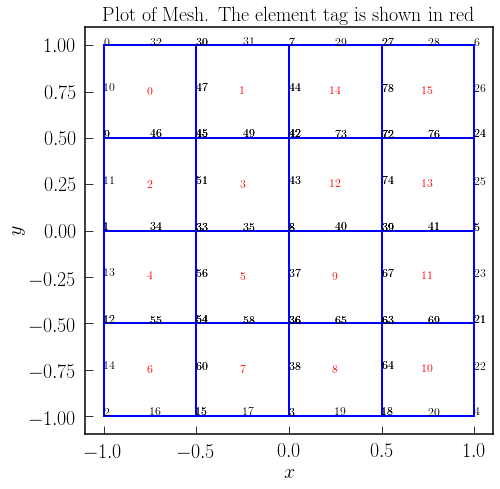

In [138]:
axes_handler = plt.axes()


msh_parser.plot_mesh_grid(advec_var.nodes, advec_var.elements,
                          advec_var.xi_LGL, advec_var.eta_LGL,
                          axes_handler, plot_LGL_grid = False,
                          print_element_tag = True,
                          print_node_tag = True)

# plt.title(r'Grid plot of a mesh for $N_{LGL} = 8$.'
#           '\n Red lines are mesh grid, and \n'
#           'blue lines are element boundaries.')
plt.title(r'Plot of Mesh. The element tag is shown in red')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.axes().set_aspect('equal')

# plt.savefig('square.png')
plt.show()

# Prototype to detect an edge of a quadrangle

In [4]:
elements = advec_var.elements

element_tag = 0

x_edge = af.constant(0., d0 = advec_var.elements.shape[0], d1 = params.N_LGL, d2 = 4, dtype = af.Dtype.f64)
y_edge = af.constant(0., d0 = advec_var.elements.shape[0], d1 = params.N_LGL, d2 = 4, dtype = af.Dtype.f64)

edge_id = 0
x_edge[:, :, edge_id] = af.transpose(a2d_arbit_mesh.u_at_edge(advec_var.x_e_ij,
                                                              edge_id, advec_var))
y_edge[:, :, edge_id] = af.transpose(a2d_arbit_mesh.u_at_edge(advec_var.y_e_ij,
                                                              edge_id, advec_var))

edge_id = 1
x_edge[:, :, edge_id] = af.transpose(a2d_arbit_mesh.u_at_edge(advec_var.x_e_ij,
                                                              edge_id, advec_var))
y_edge[:, :, edge_id] = af.transpose(a2d_arbit_mesh.u_at_edge(advec_var.y_e_ij,
                                                              edge_id, advec_var))


edge_id = 2
x_edge[:, :, edge_id] = af.transpose(a2d_arbit_mesh.u_at_edge(advec_var.x_e_ij,
                                                              edge_id, advec_var))
y_edge[:, :, edge_id] = af.transpose(a2d_arbit_mesh.u_at_edge(advec_var.y_e_ij,
                                                              edge_id, advec_var))

edge_id = 3
x_edge[:, :, edge_id] = af.transpose(a2d_arbit_mesh.u_at_edge(advec_var.x_e_ij,
                                                              edge_id, advec_var))
y_edge[:, :, edge_id] = af.transpose(a2d_arbit_mesh.u_at_edge(advec_var.y_e_ij,
                                                              edge_id, advec_var))


gmshTranslator: Ending


In [5]:
x_edge_c = af.mean(x_edge, dim = 1)
y_edge_c = af.mean(y_edge, dim = 1)

x_quad_c = af.mean(af.mean(x_edge, dim = 1), dim = 2)
y_quad_c = af.mean(af.mean(y_edge, dim = 1), dim = 2)

In [7]:
delta_x_edge_c = af.reorder(af.broadcast(utils.add, x_edge_c, -x_quad_c), d0 = 0, d1 = 2, d2 = 1)
delta_y_edge_c = af.reorder(af.broadcast(utils.add, y_edge_c, -y_quad_c), d0 = 0, d1 = 2, d2 = 1)

In [8]:
delta_xy_complex = np.array(delta_x_edge_c + 1j * delta_y_edge_c)

In [9]:
edge_angle = af.np_to_af_array(np.angle(delta_xy_complex, deg = True))
angle_less_than_zero = af.cast(edge_angle < 0, dtype = af.Dtype.f64)
edge_angle = edge_angle + angle_less_than_zero * 360
print(edge_angle)

arrayfire.Array()
Type: double

[16 4 1 1]
  180.0000   270.0000   360.0000    90.0000 
  180.0000   270.0000   360.0000    90.0000 
  180.0000   270.0000   360.0000    90.0000 
  180.0000   270.0000   360.0000    90.0000 
  180.0000   270.0000     0.0000    90.0000 
  180.0000   270.0000   360.0000    90.0000 
  180.0000   270.0000   360.0000    90.0000 
  180.0000   270.0000   360.0000    90.0000 
  270.0000   360.0000    90.0000   180.0000 
  270.0000   360.0000    90.0000   180.0000 
  270.0000   360.0000    90.0000   180.0000 
  270.0000   360.0000    90.0000   180.0000 
  180.0000    90.0000   360.0000   270.0000 
  180.0000    90.0000     0.0000   270.0000 
  180.0000    90.0000     0.0000   270.0000 
  180.0000    90.0000     0.0000   270.0000 




In [11]:
# Identifying physical right edges
physical_right_edge = (edge_angle >= 315.) * (edge_angle <= 360) + (edge_angle >= 0.) * (edge_angle <= 45)

# Identifying physical top edges
physical_top_edge = (edge_angle >= 45) * (edge_angle <= 135)

# Identifying physical left edges
physical_left_edge = (edge_angle >= 135) * (edge_angle <= 225)

# Identifying physical left edges
physical_bottom_edge = (edge_angle >= 225) * (edge_angle < 315)

In [12]:
print_with_index(physical_top_edge)

0 	->	0	0	0	1	
1 	->	0	0	0	1	
2 	->	0	0	0	1	
3 	->	0	0	0	1	
4 	->	0	0	0	1	
5 	->	0	0	0	1	
6 	->	0	0	0	1	
7 	->	0	0	0	1	
8 	->	0	0	1	0	
9 	->	0	0	1	0	
10 	->	0	0	1	0	
11 	->	0	0	1	0	
12 	->	0	1	0	0	
13 	->	0	1	0	0	
14 	->	0	1	0	0	
15 	->	0	1	0	0	



In [120]:
edge_reorder = physical_left_edge * 1 + physical_bottom_edge * 2 + physical_right_edge * 3 + physical_top_edge * 4 - 1
print_with_index(edge_reorder)

0 	->	0	1	2	3	
1 	->	0	1	2	3	
2 	->	0	1	2	3	
3 	->	0	1	2	3	
4 	->	0	1	2	3	
5 	->	0	1	2	3	
6 	->	0	1	2	3	
7 	->	0	1	2	3	
8 	->	1	2	3	0	
9 	->	1	2	3	0	
10 	->	1	2	3	0	
11 	->	1	2	3	0	
12 	->	0	3	2	1	
13 	->	0	3	2	1	
14 	->	0	3	2	1	
15 	->	0	3	2	1	



# Writing the formal code to identify the edges of an element

In [ ]:
elements = advec_var.elements

element_tag = 0

x_edge = af.constant(0., d0 = advec_var.elements.shape[0], d1 = params.N_LGL, d2 = 4, dtype = af.Dtype.f64)
y_edge = af.constant(0., d0 = advec_var.elements.shape[0], d1 = params.N_LGL, d2 = 4, dtype = af.Dtype.f64)

edge_id = 0
x_edge[:, :, edge_id] = af.transpose(a2d_arbit_mesh.u_at_edge(advec_var.x_e_ij,
                                                              edge_id, advec_var))
y_edge[:, :, edge_id] = af.transpose(a2d_arbit_mesh.u_at_edge(advec_var.y_e_ij,
                                                              edge_id, advec_var))

edge_id = 1
x_edge[:, :, edge_id] = af.transpose(a2d_arbit_mesh.u_at_edge(advec_var.x_e_ij,
                                                              edge_id, advec_var))
y_edge[:, :, edge_id] = af.transpose(a2d_arbit_mesh.u_at_edge(advec_var.y_e_ij,
                                                              edge_id, advec_var))


edge_id = 2
x_edge[:, :, edge_id] = af.transpose(a2d_arbit_mesh.u_at_edge(advec_var.x_e_ij,
                                                              edge_id, advec_var))
y_edge[:, :, edge_id] = af.transpose(a2d_arbit_mesh.u_at_edge(advec_var.y_e_ij,
                                                              edge_id, advec_var))

edge_id = 3
x_edge[:, :, edge_id] = af.transpose(a2d_arbit_mesh.u_at_edge(advec_var.x_e_ij,
                                                              edge_id, advec_var))
y_edge[:, :, edge_id] = af.transpose(a2d_arbit_mesh.u_at_edge(advec_var.y_e_ij,
                                                              edge_id, advec_var))

###################################################################################
###################################################################################

x_edge_c = af.mean(x_edge, dim = 1)
y_edge_c = af.mean(y_edge, dim = 1)

x_quad_c = af.mean(af.mean(x_edge, dim = 1), dim = 2)
y_quad_c = af.mean(af.mean(y_edge, dim = 1), dim = 2)

###################################################################################
###################################################################################

delta_x_edge_c = af.reorder(af.broadcast(utils.add, x_edge_c, -x_quad_c), d0 = 0, d1 = 2, d2 = 1)
delta_y_edge_c = af.reorder(af.broadcast(utils.add, y_edge_c, -y_quad_c), d0 = 0, d1 = 2, d2 = 1)

###################################################################################
###################################################################################

delta_xy_complex = np.array(delta_x_edge_c + 1j * delta_y_edge_c)

###################################################################################
###################################################################################

edge_angle = af.np_to_af_array(np.angle(delta_xy_complex, deg = True))
angle_less_than_zero = af.cast(edge_angle < 0, dtype = af.Dtype.f64)
edge_angle = edge_angle + angle_less_than_zero * 360
print(edge_angle)

###################################################################################
###################################################################################

# Identifying physical right edges
physical_right_edge = (edge_angle >= 315.) * (edge_angle <= 360) + (edge_angle >= 0.) * (edge_angle <= 45)

# Identifying physical top edges
physical_top_edge = (edge_angle >= 45) * (edge_angle <= 135)

# Identifying physical left edges
physical_left_edge = (edge_angle >= 135) * (edge_angle <= 225)

# Identifying physical left edges
physical_bottom_edge = (edge_angle >= 225) * (edge_angle < 315)

###################################################################################
###################################################################################

edge_reorder = physical_left_edge * 1 + physical_bottom_edge * 2 + physical_right_edge * 3 + physical_top_edge * 4 - 1
print_with_index(edge_reorder)

In [119]:
def get_edge_nodes(elements, element_tag, edge_id):
    '''
    '''
    edge_nodes_tag = None
    
    if edge_id < 3:
        edge_nodes_tag =  elements[element_tag, edge_id * 2:(edge_id * 2 + 3)]
    else:
#         print(elements[element_tag, edge_id * 2:(edge_id * 2 + 2)])
        edge_nodes_tag = np.append(elements[element_tag, edge_id * 2:(edge_id * 2 + 2)],
                                   elements[element_tag, 0])
    
    edge_nodes = advec_var.nodes[edge_nodes_tag]
#     print(edge_nodes)
    return edge_nodes_tag



In [15]:
edge_nodes(elements, 12, 2)

[[ 0.5   0.5 ]
 [ 0.5   0.25]
 [ 0.5   0.  ]]


array([72, 74, 39])

In [118]:
new_element_edge_ordering = np.zeros(advec_var.elements.shape, dtype = np.int64)

for element_tag in np.arange(advec_var.elements.shape[0]):
# element_tag = 0
    for edge_id in np.arange(4):
        if edge_id < 3:
            new_element_edge_ordering[element_tag,
                                      int(af.sum(edge_reorder[element_tag, edge_id])) \
                                      * 2:(int(af.sum(edge_reorder[element_tag, edge_id])) \
                                           * 2 + 3)] = edge_nodes(elements, element_tag, edge_id)
        else:
            print(edge_nodes(elements, element_tag, edge_id), int(af.sum(edge_reorder[element_tag, edge_id])))
            new_element_edge_ordering[element_tag,
                                      int(af.sum(edge_reorder[element_tag, edge_id])) \
                                      * 2:(int(af.sum(edge_reorder[element_tag, edge_id])) \
                                           * 2 + 3)] = edge_nodes(elements, element_tag, edge_id)


TypeError: 'numpy.ndarray' object is not callable

In [157]:
print_with_index(new_element_edge_ordering)

0 	->	0	10	9	46	45	47	30	32	0	
1 	->	30	47	45	49	42	44	7	31	30	
2 	->	9	11	1	34	33	51	45	46	9	
3 	->	45	51	33	35	8	43	42	49	45	
4 	->	1	13	12	55	54	56	33	34	1	
5 	->	33	56	54	58	36	37	8	35	33	
6 	->	12	14	2	16	15	60	54	55	12	
7 	->	54	60	15	17	3	38	36	58	54	
8 	->	36	38	3	19	18	64	63	65	36	
9 	->	8	37	36	65	63	67	39	40	8	
10 	->	63	64	18	20	4	22	21	69	63	
11 	->	39	67	63	69	21	23	5	41	39	
12 	->	8	43	39	40	8	74	39	73	72	
13 	->	39	74	5	41	39	25	5	76	24	
14 	->	42	44	72	73	42	78	72	29	27	
15 	->	72	78	24	76	72	26	24	28	6	



# Prototype implementation for rearranging the edge nodes for each edge

In [67]:
# Rearrange the edge nodes

# Rearrange the left edge nodes
element_tag_left_edge = edge_nodes(elements,
                                   element_tag = 12,
                                   edge_id = 0)

# Arrange the nodes for left nodes
y_nodes = advec_var.nodes[element_tag_left_edge][:, 1]

y_nodes_dic_node_tag = np.zeros([y_nodes.shape[0], 2])
y_nodes_dic_node_tag[:, 0] = y_nodes
y_nodes_dic_node_tag[:, 1] = element_tag_left_edge

y_nodes_argsort = np.argsort(y_nodes_dic_node_tag, axis = 0)
left_edge_nodes = np.flipud(element_tag_left_edge[y_nodes_argsort[:, 0]])

# [LOOKS FINE]

# Rearrange the bottom edge nodes.
element_tag_bottom_edge = edge_nodes(elements,
                                     element_tag = 12,
                                     edge_id = 1)

# Arrange the nodes for bottom nodes
x_nodes = advec_var.nodes[element_tag_bottom_edge][:, 0]

x_nodes_dic_node_tag = np.zeros([x_nodes.shape[0], 2])
x_nodes_dic_node_tag[:, 0] = x_nodes
x_nodes_dic_node_tag[:, 1] = element_tag_bottom_edge

print(x_nodes_dic_node_tag)
x_nodes_argsort = np.argsort(x_nodes_dic_node_tag, axis = 0)
bottom_edge_nodes = element_tag_bottom_edge[x_nodes_argsort[:, 0]]
print(bottom_edge_nodes)

# [LOOKS FINE]

# Rearrange the right edge nodes
element_tag_right_edge = edge_nodes(elements,
                                    element_tag = 12,
                                    edge_id = 2)

# Arrange the nodes for right nodes
y_nodes = advec_var.nodes[element_tag_right_edge][:, 1]

y_nodes_dic_node_tag = np.zeros([y_nodes.shape[0], 2])
y_nodes_dic_node_tag[:, 0] = y_nodes
y_nodes_dic_node_tag[:, 1] = element_tag_right_edge

y_nodes_argsort = np.argsort(y_nodes_dic_node_tag, axis = 0)
right_edge_nodes = element_tag_right_edge[y_nodes_argsort[:, 0]]

print(right_edge_nodes)
# [LOOKS FINE]


# Rearrange the top edge nodes.
element_tag_top_edge = edge_nodes(elements,
                                  element_tag = 12,
                                  edge_id = 3)

# Arrange the nodes for top nodes
x_nodes = advec_var.nodes[element_tag_top_edge][:, 0]

x_nodes_dic_node_tag = np.zeros([x_nodes.shape[0], 2])
x_nodes_dic_node_tag[:, 0] = x_nodes
x_nodes_dic_node_tag[:, 1] = element_tag_top_edge

print(x_nodes_dic_node_tag)
x_nodes_argsort = np.argsort(x_nodes_dic_node_tag, axis = 0)
top_edge_nodes = np.flipud(element_tag_top_edge[x_nodes_argsort[:, 0]])
print(top_edge_nodes)

# [LOOKS FINE]



[[  0.    42.  ]
 [  0.25  73.  ]
 [  0.5   72.  ]]
[42 73 72]
[39 74 72]
[[  0.5   39.  ]
 [  0.25  40.  ]
 [  0.     8.  ]]
[39 40  8]


# Writing a formal code for the edge_nodes functions for formal ordering

In [156]:
def edge_nodes_reordered(elements, element_tag, edge_id, return_as_edge):
    '''
    '''
    edge_nodes_tag = get_edge_nodes(elements, element_tag, edge_id)
    # Left edge case
    if return_as_edge == 0:

        # Rearrange the left edge nodes
        element_tag_left_edge = edge_nodes_tag

        # Arrange the nodes for left nodes
        y_nodes = advec_var.nodes[element_tag_left_edge][:, 1]

        y_nodes_dic_node_tag = np.zeros([y_nodes.shape[0], 2])
        y_nodes_dic_node_tag[:, 0] = y_nodes
        y_nodes_dic_node_tag[:, 1] = element_tag_left_edge

        y_nodes_argsort = np.argsort(y_nodes_dic_node_tag, axis = 0)
        left_edge_nodes = np.flipud(element_tag_left_edge[y_nodes_argsort[:, 0]])

        edge_nodes_tag = left_edge_nodes
    # [LOOKS FINE]

    # Bottom edge case
    # Bottom edge case
    if return_as_edge == 1:
        # Rearrange the bottom edge nodes.
        element_tag_bottom_edge = edge_nodes_tag

        # Arrange the nodes for bottom nodes
        x_nodes = advec_var.nodes[element_tag_bottom_edge][:, 0]

        x_nodes_dic_node_tag = np.zeros([x_nodes.shape[0], 2])
        x_nodes_dic_node_tag[:, 0] = x_nodes
        x_nodes_dic_node_tag[:, 1] = element_tag_bottom_edge

        x_nodes_argsort = np.argsort(x_nodes_dic_node_tag, axis = 0)
        bottom_edge_nodes = element_tag_bottom_edge[x_nodes_argsort[:, 0]]
        
        edge_nodes_tag = bottom_edge_nodes
        # [LOOKS FINE]

    # Right edge case
    if return_as_edge == 2:
        # Rearrange the right edge nodes
        element_tag_right_edge = edge_nodes_tag

        # Arrange the nodes for right nodes
        y_nodes = advec_var.nodes[element_tag_right_edge][:, 1]

        y_nodes_dic_node_tag = np.zeros([y_nodes.shape[0], 2])
        y_nodes_dic_node_tag[:, 0] = y_nodes
        y_nodes_dic_node_tag[:, 1] = element_tag_right_edge

        y_nodes_argsort = np.argsort(y_nodes_dic_node_tag, axis = 0)
        right_edge_nodes = element_tag_right_edge[y_nodes_argsort[:, 0]]

        edge_nodes_tag = right_edge_nodes
        # [LOOKS FINE]

    # Top edge case
    if return_as_edge == 3:
        # Rearrange the right edge nodes
        element_tag_top_edge = edge_nodes_tag

        # Arrange the nodes for top nodes
        x_nodes = advec_var.nodes[element_tag_top_edge][:, 0]

        x_nodes_dic_node_tag = np.zeros([x_nodes.shape[0], 2])
        x_nodes_dic_node_tag[:, 0] = x_nodes
        x_nodes_dic_node_tag[:, 1] = element_tag_top_edge

        x_nodes_argsort = np.argsort(x_nodes_dic_node_tag, axis = 0)
        top_edge_nodes = np.flipud(element_tag_top_edge[x_nodes_argsort[:, 0]])
        
        edge_nodes_tag = top_edge_nodes
        # [LOOKS FINE]

    return edge_nodes_tag

# Testing edge_nodes_reordered functions
- Tested for an element in each of the four parts of the non-contiguous mesh. It works!

In [136]:
elements = advec_var.elements
element_tag = 12
edge_id = 3
return_as_edge = 1

print(edge_nodes_reordered(elements, element_tag, edge_id, return_as_edge))

[39 40  8]
-> [ 8 40 39]
[ 8 40 39]


# Implement the function to rearrange the edges for every elements

In [121]:
print_with_index(edge_reorder)

0 	->	0	1	2	3	
1 	->	0	1	2	3	
2 	->	0	1	2	3	
3 	->	0	1	2	3	
4 	->	0	1	2	3	
5 	->	0	1	2	3	
6 	->	0	1	2	3	
7 	->	0	1	2	3	
8 	->	1	2	3	0	
9 	->	1	2	3	0	
10 	->	1	2	3	0	
11 	->	1	2	3	0	
12 	->	0	3	2	1	
13 	->	0	3	2	1	
14 	->	0	3	2	1	
15 	->	0	3	2	1	



In [157]:
new_element_edge_ordering = np.zeros(advec_var.elements.shape, dtype = np.int64)

for element_tag in np.arange(advec_var.elements.shape[0]):
    for edge_id in np.arange(4):
        return_as_edge_id = int(af.sum(edge_reorder[element_tag, edge_id]))
        new_element_edge_ordering[element_tag, return_as_edge_id * 2:(return_as_edge_id * 2 + 3)] = \
            edge_nodes_reordered(elements, element_tag, edge_id, return_as_edge = af.sum(edge_reorder[element_tag, edge_id]))

print(new_element_edge_ordering)

[[ 0 10  9 46 45 47 30 32  0]
 [30 47 45 49 42 44  7 31 30]
 [ 9 11  1 34 33 51 45 46  9]
 [45 51 33 35  8 43 42 49 45]
 [ 1 13 12 55 54 56 33 34  1]
 [33 56 54 58 36 37  8 35 33]
 [12 14  2 16 15 60 54 55 12]
 [54 60 15 17  3 38 36 58 54]
 [36 38  3 19 18 64 63 65 36]
 [ 8 37 36 65 63 67 39 40  8]
 [63 64 18 20  4 22 21 69 63]
 [39 67 63 69 21 23  5 41 39]
 [42 43  8 40 39 74 72 73 42]
 [72 74 39 41  5 25 24 76 72]
 [ 7 44 42 73 72 78 27 29  7]
 [27 78 72 76 24 26  6 28 27]]


/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


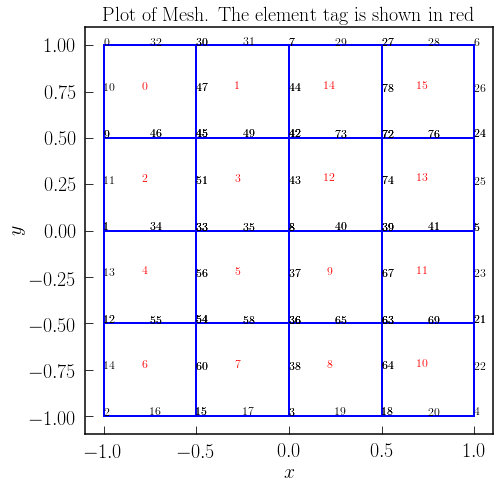

In [158]:
axes_handler = plt.axes()


msh_parser.plot_mesh_grid(advec_var.nodes, new_element_edge_ordering,
                          advec_var.xi_LGL, advec_var.eta_LGL,
                          axes_handler, plot_LGL_grid = False,
                          print_element_tag = True,
                          print_node_tag = True)

# plt.title(r'Grid plot of a mesh for $N_{LGL} = 8$.'
#           '\n Red lines are mesh grid, and \n'
#           'blue lines are element boundaries.')
plt.title(r'Plot of Mesh. The element tag is shown in red')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.axes().set_aspect('equal')

# plt.savefig('square.png')
plt.show()